<center>
<img src="../img/ml_theme.png">
# Майнор "Интеллектуальный анализ данных" 
# Курс "Введение в машинное обучение"
<img src="../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель ФКН НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-Share Alike 4.0</a>. Можно использовать в любых целях, но с обязательным упоминанием автора курса и аффилиации.

## Семинар 9. Дополнительная часть. Соревнование Kaggle Inclass по автострахованию

<a href="https://inclass.kaggle.com/c/hse-minor-20152">Соревнование</a>, исходное <a href="http://microsoftbi.ru/2015/06/06/hackathon2015ml/">описание</a> задачи. 

Задача бинарной классификации. Имеются автомобили, для которых указан регистрационный номер и марка, и выплаты страховой компании по инцидентам с участием данного автомобиля. Страховая компания для себя решает, много она заплатила или мало. 

Объекты - автомобили.

Признаки:

- Регистрационный номер автомобиля (auto_number, уникальный, строка)
- Марка автомобиля (auto_brand, строка)
- Тип выплаты (too_much) (много/мало, 1 или 0)
- Сумма выплаты при попадании водителя в аварию (compensated, целое положительное число)

### Загрузка и первичный анализ данных

In [1]:
%pylab inline
figsize(12, 8)
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Считаем обучающую и тестовую выборку, создав объекты Pandas DataFrame

In [2]:
train_df = pd.read_csv("../data/car_insurance_train.csv",
                      header=0, index_col=0)
test_df = pd.read_csv("../data/car_insurance_test.csv",
                           header=0, index_col=0)

In [3]:
train_df.describe(include='all')

,auto_number,auto_brand,compensated,too_much
count,817,817,817.000000,817.000000
unique,497,13,NaN,NaN
top,9499KX178RUS,Ford Focus,NaN,NaN
freq,5,658,NaN,NaN
mean,NaN,NaN,7939.779682,0.516524
std,NaN,NaN,15688.445587,0.500033
min,NaN,NaN,100.000000,0.000000
25%,NaN,NaN,1000.000000,0.000000
50%,NaN,NaN,3000.000000,1.000000
75%,NaN,NaN,8000.000000,1.000000


In [4]:
train_df.head(10)

,auto_number,auto_brand,compensated,too_much
id,,,,
1,Y163O8161RUS,Ford Focus,3200,1
2,E432XX77RUS,Toyota Camry,6500,0
3,7184TT36RUS,Ford Focus,2100,0
4,X582HE161RUS,Ford Focus,2000,1
5,E34877152RUS,Ford Focus,6100,1
6,92918M178RUS,Ford Focus,5700,0
7,E53488152RUS,Ford Focus,1800,1
8,X4128H125RUS,Ford Focus,500,0
9,C593EY154RUS,Ford Focus,1000,0


In [5]:
test_df.describe(include='all')

,auto_number,auto_brand,compensated
count,100,100,100.00000
unique,95,9,NaN
top,O718MM163RUS,Ford Focus,NaN
freq,3,81,NaN
mean,NaN,NaN,6712.00000
std,NaN,NaN,11093.92663
min,NaN,NaN,100.00000
25%,NaN,NaN,1000.00000
50%,NaN,NaN,3000.00000
75%,NaN,NaN,7050.00000


In [6]:
test_df.head()

,auto_number,auto_brand,compensated
id,,,
1,E29677161RUS,Ford Focus,6000
2,T020MM116RUS,Skoda Octavia,3000
3,C798ET50RUS,Ford Focus,5000
4,Y7719C197RUS,Ford Focus,4600
5,9502XX38RUS,Skoda Octavia,3000


Распределение признака "марка авто"

In [7]:
train_df['auto_brand'].value_counts()

Ford Focus            658
Skoda Octavia          51
Volkswagen Golf        24
Volkswagen Passat      21
Toyota Corolla         18
Toyota Camry           17
Ford Mondeo             8
Volkswagen Jetta        7
Volkswagen Touareg      4
BMW                     3
Volkswagen              3
Volvo                   2
Audi                    1
dtype: int64

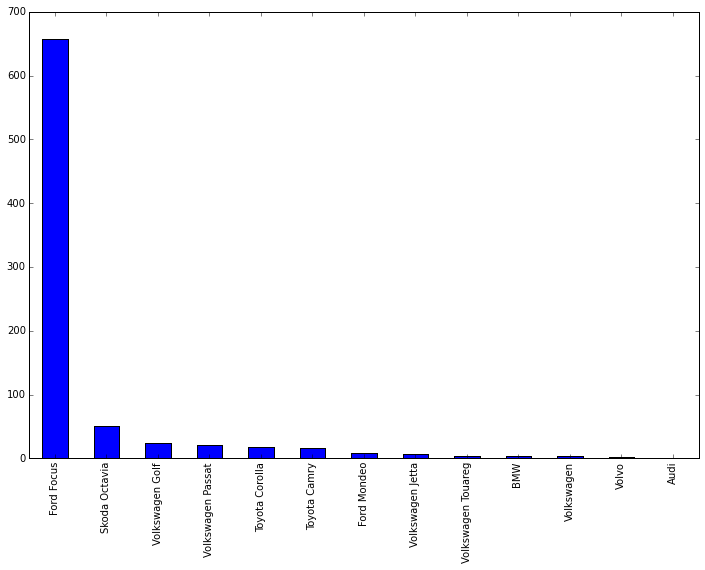

In [8]:
train_df['auto_brand'].value_counts().plot(kind='bar')
# help(pd.core.series.Series.plot)

In [9]:
test_df['auto_brand'].value_counts()

Ford Focus           81
Skoda Octavia         8
Volkswagen Passat     3
Ford Mondeo           2
Toyota Corolla        2
Volkswagen Jetta      1
BMW                   1
Volkswagen Golf       1
Toyota Camry          1
dtype: int64

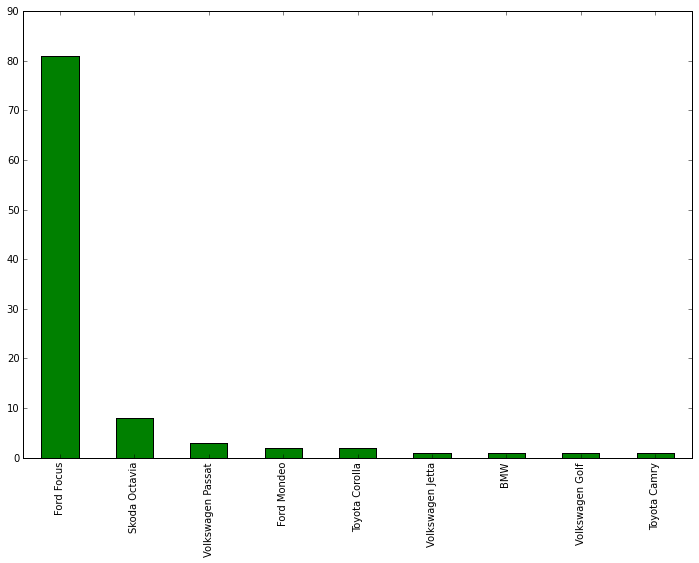

In [10]:
test_df['auto_brand'].value_counts().plot(kind='bar', color='green')

Распределение признака "сумма выплат"

In [11]:
train_compensated = train_df['compensated'].value_counts()
train_compensated.head()

500     73
1000    46
2000    37
1500    27
1600    22
dtype: int64

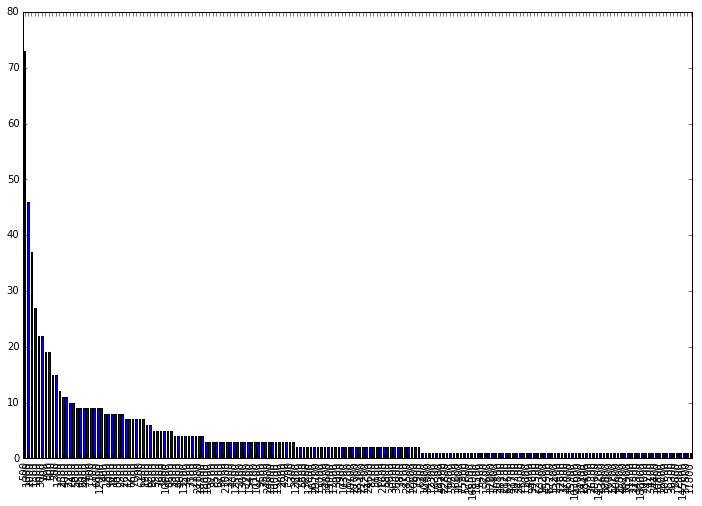

In [12]:
train_compensated.plot(kind='bar')

Распределение степенное. Отсортируем по выплатам

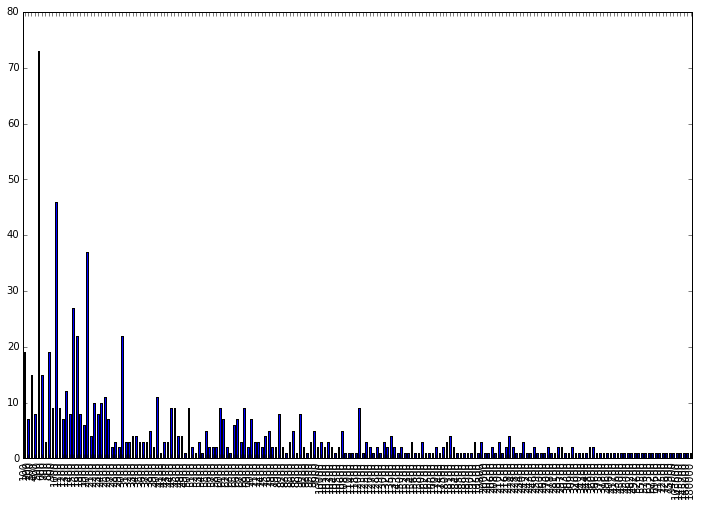

In [13]:
train_df.sort_index(by='compensated')['compensated'].value_counts().sort_index().plot(kind="bar")

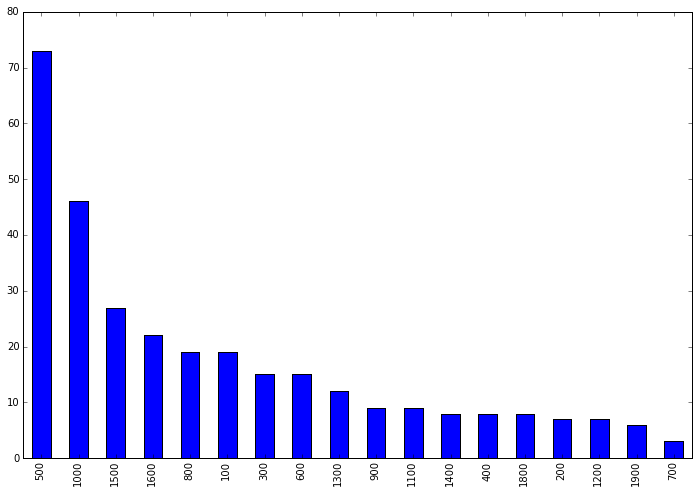

In [14]:
train_df[train_df['compensated'] < 2000]['compensated'].value_counts().plot(kind='bar', by='compensated')

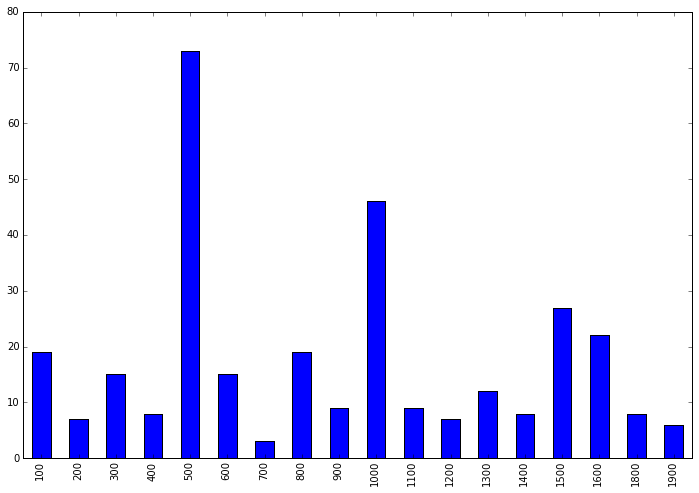

In [15]:
train_df[train_df['compensated'] < 2000].sort_index(by='compensated')['compensated']\
.value_counts().sort_index().plot(kind="bar")

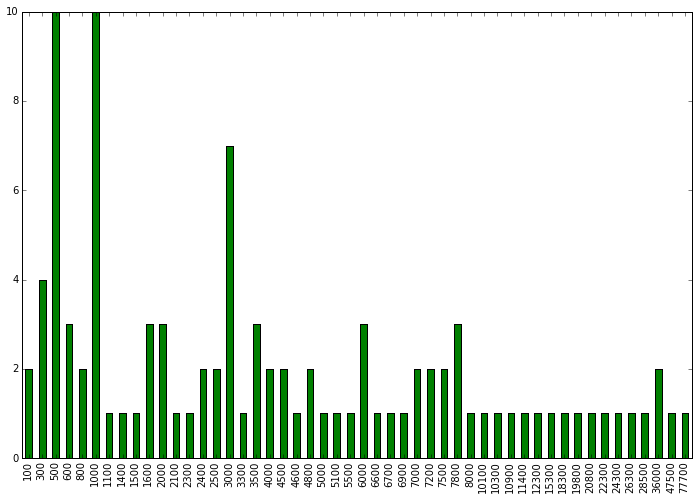

In [16]:
test_df.sort_index(by='compensated')['compensated'].value_counts().sort_index().plot(kind="bar", color='green')

Посмотрим на распеределение классов в обучающей выборке

In [17]:
train_df['too_much'].value_counts()

1    422
0    395
dtype: int64

Распределение сумм выплат при разных марках автомобиля с указанием целевого класса

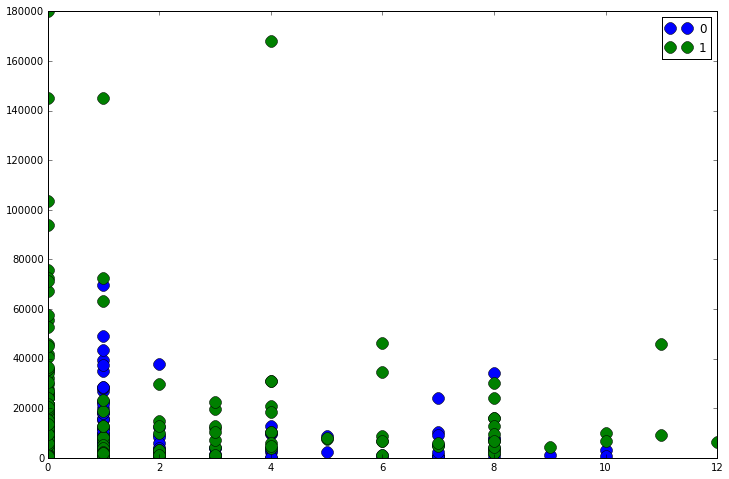

In [18]:
target_groups = train_df.groupby('too_much')
for name, group in target_groups:
    auto_brand_cat = pd.Categorical(group['auto_brand'], categories=group['auto_brand'].unique())
    plot(auto_brand_cat.codes, group['compensated'], marker='o', linestyle='', ms=12, label=name)
    legend()

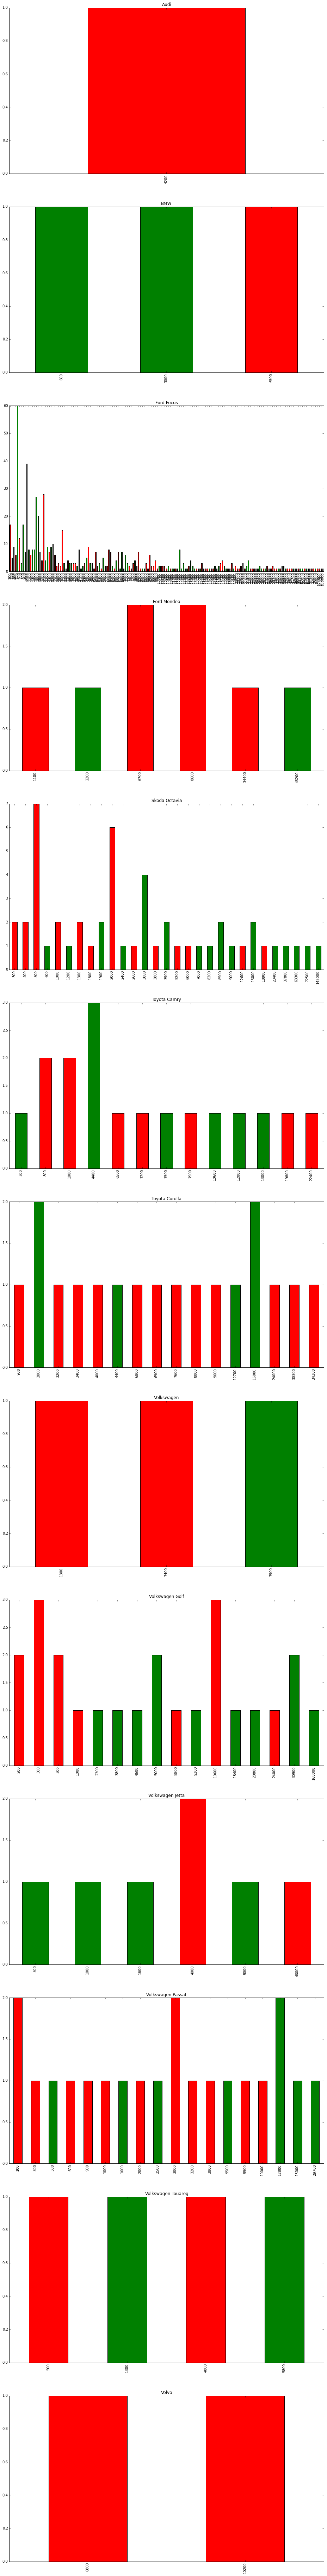

In [19]:
num_unique_brands = len(train_df['auto_brand'].unique())
fig, axes = subplots(nrows=num_unique_brands, ncols=1)

brand_groups = train_df.groupby('auto_brand')
for brand_id, (brand_name, sub_df) in enumerate(brand_groups):
    colors = ['red' if too_much else 'green' 
              for too_much in sub_df['too_much']]
    sub_df['compensated'].value_counts().sort_index().plot(kind="bar", color=colors, 
                                                     ax=axes[brand_id], 
                                                     figsize=(16, 10 * num_unique_brands))
    axes[brand_id].set_title(brand_name)

Видно, что целевой класс плохо предсказывается только суммой выплат.

In [20]:
from scipy.stats.stats import pearsonr 

pearsonr(train_df['too_much'], train_df['compensated'])

# help(pearsonr)

(0.25744940132440336, 7.7910834965569756e-14)

Значит, есть какие-то неучтенные факторы. Можно, например, попробовать извлечь из номера автомобиля номер регион. Но это позже. Пока поработаем с тем, что есть. Построим на имеющейся выборке дерево решений.

### Обучение дерева решений sklearn.tree.DecisionTreeClassifier

Пока не учитываем номер машины, не несущим полезной информации. 

In [21]:
import numpy as np
from sklearn import preprocessing


# better to write special function for data loading 
def load_train_and_test(path_to_train, path_to_test):
    # read data into pandas data frames
    train_df = pd.read_csv(path_to_train,
                           header=0, index_col=0)
    test_df = pd.read_csv(path_to_test,
                          header=0, index_col=0)

    # number of observations (objects) in train and test sets
    n_train, n_test = train_df.shape[0], test_df.shape[0]

    # auto brand and too_much are categorical so we encode these columns
    # ex: "Volvo" -> 1, "Audi" -> 2 etc
    auto_brand_encoder = preprocessing.LabelEncoder()
    auto_brand_encoder.fit(train_df['auto_brand'])
    target_encoder = preprocessing.LabelEncoder()
    target_encoder.fit(train_df['too_much'])

    # form a numpy array to fit as a train set
    # X will have encoded columns 'auto_brand' and 'compensated'
    X_train = np.hstack([auto_brand_encoder.transform(train_df['auto_brand'])
                  .reshape([n_train,1]),
                   train_df['compensated']
                  .reshape([n_train,1])])

    # form a numpy array to fit as train set labels
    y = target_encoder.transform(train_df['too_much'])

    # form a numpy array of a test set
    X_test = np.hstack([auto_brand_encoder.transform(test_df['auto_brand'])
                  .reshape([n_test, 1]),
                   test_df['compensated']
                  .reshape([n_test,1])])

    return X_train, y, X_test, auto_brand_encoder, target_encoder

Загрузим обучающую и тестовую выборки

In [22]:
X_train, y, X_test, auto_brand_encoder, target_encoder = \
load_train_and_test("../data/car_insurance_train.csv",
                                                                            "../data/car_insurance_test.csv")

В обучающей выборке всего два признака - код, соответствующий марке авто, и сумма выплат

In [23]:
X_train.shape

(817, 2)

Пока используем дерево решений без настройки параметров ("из коробки"). <a href="http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">Документация</a> Scikit-learn по данному , export_graphviz нужен для визуализации дерева

In [24]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# make an instance of decision tree classifier
first_tree = DecisionTreeClassifier(max_depth=5)

# fit X and y (train set and corresponding labels) to the classifier
first_tree.fit(X_train, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

### Предсказание выплат для тестовой выборки

Предсказываем метки для объектов тестовой выборки 

In [25]:
predicted_labels = first_tree.predict(X_test)

Можно записать ответы в csv-файл (для отправки в Kaggle)

In [26]:
# turn predictions into data frame and save as csv file
predicted_df = pd.DataFrame(predicted_labels,
                            index = np.arange(1, X_test.shape[0] + 1),
                            columns=["too_much"])
predicted_df.to_csv("tree_prediction.csv", index_label="id")

In [27]:
# export tree visualization
# after that $ dot -Tpng tree.dot -o tree.png    (PNG format)
export_graphviz(first_tree, out_file="first_tree.dot")

<img src="../img/first_tree.gif">

Сравним сразу с ответами (в качестве демонстрации, в реальной задаче ответы, конечно, неизвестны).

In [29]:
from sklearn.metrics import roc_auc_score
try:
    expected_labels_df = pd.read_csv("../data/car_insurance_test_labels.csv",
                                 header=0, index_col=0)
    expected_labels = target_encoder.transform(expected_labels_df['too_much'])
    print(roc_auc_score(predicted_labels, expected_labels))
except IOError:
    print("You shouldn't know the answers")

You shouldn't know the answers


### Настройка параметров GridSearch

Указываем наборы параметров, каждое их сочетание будем проверять

In [30]:
from sklearn.grid_search import GridSearchCV

# tree params for grid search
tree_params = {'criterion': ('gini', 'entropy'), 
               'max_depth': list(range(1,11)), 
               'min_samples_leaf': list(range(1,11))}

locally_best_tree = GridSearchCV(DecisionTreeClassifier(), 
                                 tree_params, 
                                 verbose=True, n_jobs=4, cv=5)
locally_best_tree.fit(X_train, y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=4)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 jobs       | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 jobs       | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 450 jobs       | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 800 jobs       | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 994 out of 1000 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best'),
       fit_params={}, iid=True, loss_func=None, n_jobs=4,
       param_grid={'criterion': ('gini', 'entropy'), 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=True)

Лучшая из перебранных комбинаций параметров:

In [31]:
locally_best_tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [32]:
locally_best_tree.best_params_

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}

In [33]:
locally_best_tree.best_score_

0.70624235006119951

In [35]:
try:
    predicted_labels = locally_best_tree.predict(X_test)
    print(roc_auc_score(predicted_labels, expected_labels))
except NameError:
    print("We don't know test set labels")

We don't know test set labels


На Kaggle у этого решения результат - 0.64. Это на половине тестовой выборки, вторая половина откроется в самом конце соревнования. Дедлайн - 23.59.59 10 декабря 2015 г.

In [36]:
# turn predictions into data frame and save as csv file
predicted_df = pd.DataFrame(predicted_labels,
                            index = np.arange(1, X_test.shape[0] + 1),
                            columns=["too_much"])
predicted_df.to_csv("tree_prediction.csv", index_label="id")

In [37]:
export_graphviz(locally_best_tree.best_estimator_, out_file="locally_best_tree.dot")

<img src="../img/locally_best_tree.gif">

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix

try:
    print(accuracy_score(predicted_labels, expected_labels))
    confusion_matrix(y_pred=predicted_labels, y_true=expected_labels)
except NameError:
    print("We don't know the asnswers")

We don't know the asnswers


Проверка "вручную"

## Ссылки
- <a href="https://inclass.kaggle.com/c/hse-minor-20152">Соревнование</a> на сайте Kaggle Inclass
- Исходное <a href="http://microsoftbi.ru/2015/06/06/hackathon2015ml/">описание</a> задачи
- <a href="http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">Документация</a> Scikit-learn по классу DecisionTreeClassifier